In [7]:
import os
import numpy as np
import pandas as pd
from datetime import datetime

from matplotlib import pyplot as plt
from matplotlib import cm as cm
from matplotlib import rc as rc

In [8]:
#
# data directories and filenames depending on users
#
# data directories
if 'loziel' in os.getcwd():
    directory ='/Users/leo/Documents/MOSAIC_UVP/data/'
elif 'fbirrien' in os.getcwd():
    directory = '/home/fbirrien/NuArctic/nuarctic/UVP/data/'
# filenames
# output flux filename
flx_filename = directory + 'mosaic_flux_slope.csv'

In [9]:
class Data(object):
    def __init__(self, filename):
        # load data 
        self.read_fluxes_data(filename)
        
    def read_fluxes_data(self,filename):
        #
        # load total fluxes and slope data
        #
        data = pd.read_csv(flx_filename, sep = ",")
        # time 
        time_str, time, dates = data.iloc[:,-1].values, [],[]
        for t in time_str:
            dt = datetime.strptime(t,'%Y-%m-%d %H:%M:%S')
            time.append(dt.toordinal() + (dt.hour + (dt.minute + (dt.second/60.)/60.)/24.))
            dates.append(datetime.fromordinal(dt.toordinal()))
        self.dates, self.time = np.asarray(dates), np.asarray(time)
        
        # depth and sampled volume 
        self.depth, self.volume = data.iloc[:,3].values, data.iloc[:,4].values
        # total flux and slope
        self.total_flux, self.slope = data.iloc[:,5].values, data.iloc[:,6].values

In [10]:
data=Data(flx_filename)
print (data.total_flux, np.max(data.total_flux))
print (data.slope, np.min(data.slope))

[2.04238038 1.96259417 3.88500098 ... 0.20888605 0.33828493 0.21316908] 88.60518728050968
[-3.92310889 -3.62522564 -3.10657278 ... -3.88148417 -4.01348656
 -4.39386173] -7.205786522472668


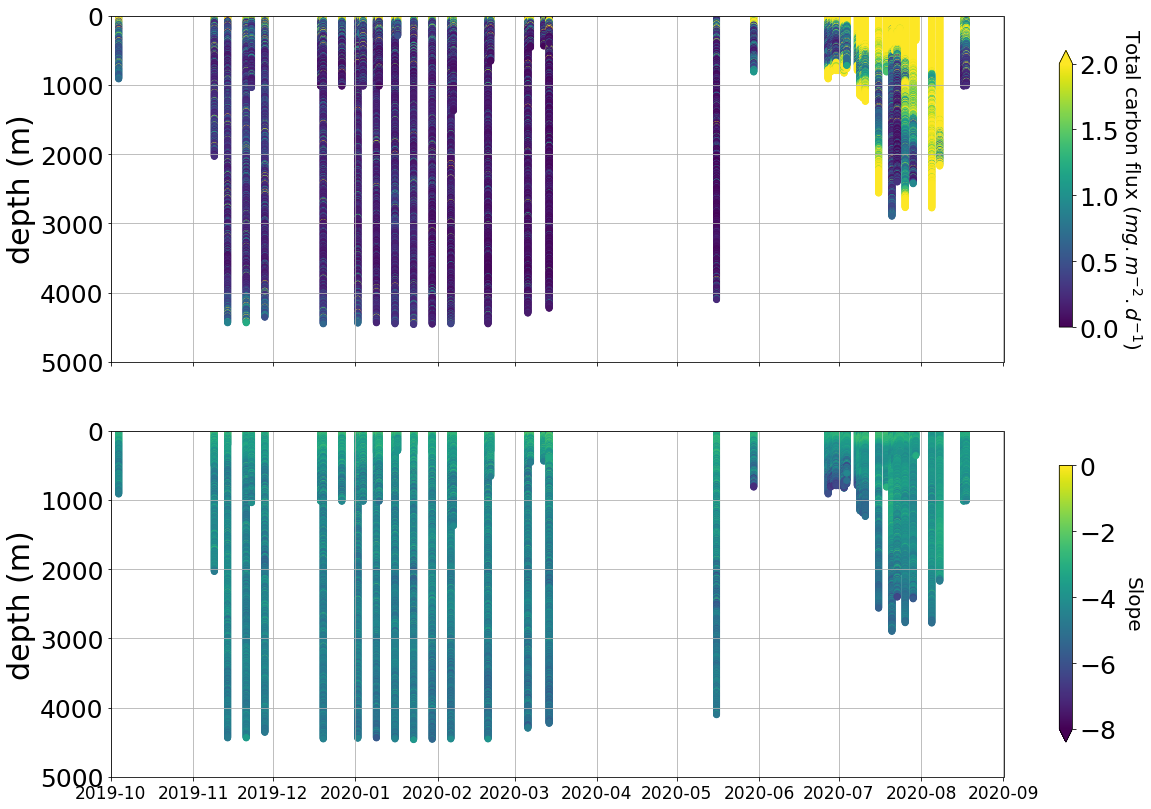

In [11]:
#
# plot fluxes and slope
#
lbsz, tcsz, mksz = 30, 25,18
rc('xtick', labelsize=tcsz-8) , rc('ytick', labelsize=tcsz)
dl = [5000,0]
# time limits
monthi, yeari, monthf, yearf = data.dates[0].month, data.dates[0].year, data.dates[-1].month, data.dates[-1].year
monthf = monthf + 1
if monthf>12:
    monthf, yearf = 1, yearf + 1 
datei, datef = datetime.strptime(str(yeari) + str(monthi) + '01', '%Y%m%d'), datetime.strptime(str(yearf) + str(monthf) + '01', '%Y%m%d')
tl=[datei, datef]
#plot
fig,ax = plt.subplots(2,sharex=True, figsize=(20,14))
# total fluxes
fm, fM = 0, 2
fplot=ax[0].scatter(data.dates, data.depth, c=data.total_flux, marker='o', vmin=fm,vmax=fM)
ax[0].set_ylabel('depth (m)', fontsize=lbsz)
# 'Total fluxes (mg.m-2.d-1)'
ax[0].grid(), ax[0].set_xlim(tl), ax[0].set_ylim(dl)
cbar=fig.colorbar(fplot,extend='max', shrink=0.8,ax=ax[0])
cbar.set_label('Total carbon flux ($mg.m^{-2}.d^{-1}$)',fontsize=20, rotation=270, labelpad=25)

# slope

sm, sM = -8,0
splot=ax[1].scatter(data.dates, data.depth,c=data.slope, vmin=sm,vmax=sM, marker='o')
ax[1].set_ylabel('depth (m)', fontsize=lbsz), ax[1].set_xlim(tl), ax[1].set_ylim(dl)
# 'slope'
ax[1].grid()
cbar=fig.colorbar(splot,extend='min', shrink=0.8,ax=ax[1])
cbar.set_label('Slope',fontsize=20, rotation=270, labelpad=25)

plt.show()